## Loading Dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
import os
import sklearn
from mlxtend.frequent_patterns import apriori, association_rules

# Loading the original dataset

In [2]:
# In this notebook we have used the entries from the US region only for the to download the original dataset click - https://www.gemconsortium.org/data/sets?id=aps
current_dir = os.getcwd()
parent = os.path.join(current_dir, os.pardir)
filepath = os.path.join(parent, 'data' , 'GEM_Individual_2018.sav')
data, meta = pyreadstat.read_sav(filepath, encoding='iso-8859-1')

In [3]:
df=pd.DataFrame(data)
df

,country,ctryalp,REGION,WEFInc,WEFIncREV,yrsurv,setid,ID,weight,WEIGHT_L,...,TEAEXPST,TEAEXPWK,IPACT_ALL,IPACT_EMP,IPACTNOW_ALL,IPACTNOW_EMP,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
0,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10001.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10002.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10003.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10004.0,0.866064,0.858973,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10005.0,0.866064,0.858973,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162072,974.0,QA,2.0,4.0,3.0,2018.0,9.741801e+11,121025.0,0.834000,0.836022,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
162073,974.0,QA,2.0,4.0,3.0,2018.0,9.741801e+11,121104.0,1.050000,1.052545,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162074,974.0,QA,2.0,4.0,3.0,2018.0,9.741801e+11,121115.0,0.960000,0.962327,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162075,974.0,QA,2.0,4.0,3.0,2018.0,9.741801e+11,121146.0,0.834000,0.836022,...,NaN,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [4]:
df[df['ctryalp'] == 'IN']

,country,ctryalp,REGION,WEFInc,WEFIncREV,yrsurv,setid,ID,weight,WEIGHT_L,...,TEAEXPST,TEAEXPWK,IPACT_ALL,IPACT_EMP,IPACTNOW_ALL,IPACTNOW_EMP,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
104837,91.0,IN,2.0,2.0,1.0,2018.0,9.118003e+10,27759.0,2.5117,2.511691,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
104838,91.0,IN,2.0,2.0,1.0,2018.0,9.118008e+10,77069.0,0.4703,0.470298,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104839,91.0,IN,2.0,2.0,1.0,2018.0,9.118017e+10,173797.0,0.4700,0.469998,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
104840,91.0,IN,2.0,2.0,1.0,2018.0,9.118018e+10,177292.0,0.4837,0.483698,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
104841,91.0,IN,2.0,2.0,1.0,2018.0,9.118018e+10,182525.0,0.4896,0.489598,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108997,91.0,IN,2.0,2.0,1.0,2018.0,9.127996e+10,99961935.0,2.0885,2.088492,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108998,91.0,IN,2.0,2.0,1.0,2018.0,9.127999e+10,99986569.0,0.4630,0.462998,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108999,91.0,IN,2.0,2.0,1.0,2018.0,9.127999e+10,99986625.0,0.4700,0.469998,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
109000,91.0,IN,2.0,2.0,1.0,2018.0,9.128000e+10,99997269.0,2.6641,2.664090,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Using only Indian citizens

In [5]:
listus = df[df['country']==91.0]
df_us=pd.DataFrame(listus)

Converting to csv to open in readable format

In [6]:
df_us.to_csv(os.path.join(parent, 'data','gem_ind_individual.csv'), index=False)

In [7]:
df_us

,country,ctryalp,REGION,WEFInc,WEFIncREV,yrsurv,setid,ID,weight,WEIGHT_L,...,TEAEXPST,TEAEXPWK,IPACT_ALL,IPACT_EMP,IPACTNOW_ALL,IPACTNOW_EMP,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
104837,91.0,IN,2.0,2.0,1.0,2018.0,9.118003e+10,27759.0,2.5117,2.511691,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
104838,91.0,IN,2.0,2.0,1.0,2018.0,9.118008e+10,77069.0,0.4703,0.470298,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104839,91.0,IN,2.0,2.0,1.0,2018.0,9.118017e+10,173797.0,0.4700,0.469998,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
104840,91.0,IN,2.0,2.0,1.0,2018.0,9.118018e+10,177292.0,0.4837,0.483698,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
104841,91.0,IN,2.0,2.0,1.0,2018.0,9.118018e+10,182525.0,0.4896,0.489598,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108997,91.0,IN,2.0,2.0,1.0,2018.0,9.127996e+10,99961935.0,2.0885,2.088492,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108998,91.0,IN,2.0,2.0,1.0,2018.0,9.127999e+10,99986569.0,0.4630,0.462998,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108999,91.0,IN,2.0,2.0,1.0,2018.0,9.127999e+10,99986625.0,0.4700,0.469998,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
109000,91.0,IN,2.0,2.0,1.0,2018.0,9.128000e+10,99997269.0,2.6641,2.664090,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4165 entries, 104837 to 109001
Columns: 281 entries, country to IPACTLDNOW_EMP
dtypes: float64(257), object(24)
memory usage: 9.0+ MB


ultimately want to check for TEA (Total Entrepreunial Activity) in a respondent

In [9]:
TEA_cols = [col for col in df_us.columns if 'TEA' in col]
print(TEA_cols)

print(len(TEA_cols))



['TEA18', 'TEA18MAL', 'TEA18FEM', 'TEA18MOP', 'TEA18FOP', 'TEA18MNE', 'TEA18FNE', 'TEA18STA', 'TEA18OPP', 'TEA18NEC', 'TEA18OTH', 'TEA18MOT', 'TEA18IDO', 'TEA18MIX', 'TEA18WHY', 'TEAOPTYP', 'TEAMOTIV', 'TEAISIC4_4D', 'TEASIC4C', 'TEAISIC4_1D', 'TEA18MEM', 'TEACUST', 'TEACOMP', 'TEATECH', 'TEA18NTC', 'TEAHITEC', 'TEA18TEC', 'TEA18NPM', 'TEA18JNW', 'TEA18J5Y', 'TEAJOBGR', 'TEAJOBGP', 'TEA18JOB', 'TEAOWNER', 'TEA18EMP', 'TEA18HJG', 'TEAEXP4C', 'TEANEC_P', 'TEAOPP_P', 'TEAJOBEX', 'TEANEWPR', 'TEANEWMK', 'TEAEXPST', 'TEAEXPWK']
44


which TEA to use as dependent variable?????

In [10]:
most_filled_tea_col = df.filter(regex='TEA').count().idxmax()
most_filled_tea_col

'TEA18'

In [11]:
df_us['TEA18'].describe()

count    4165.000000
mean        0.131092
std         0.337542
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TEA18, dtype: float64

In [12]:
null_count =0
for val in df_us['TEA18'] :
    if pd.isnull(val):
        null_count += 1;
 
print(null_count)

0


TEA18 has no null values and takes binary values only, most suited for judging Total Entrepreunial Activity..

## Columns Of Interest
{suskill,knowent,opport,fearfail,hhsize,gender,GEMHHINC,age,UNEDUC,discent,busang,ESTBBUSO,nbgoodcq,easystart,nbstatus,nboscent,nbmedia}

In [13]:
keep_col=['TEA18','suskill','knowent','opport','fearfail','hhsize','gender','GEMHHINC','age','UNEDUC','discent','busang','ESTBBUSO','easystart','nbstatus','nbmedia']
dfus_new=df_us[keep_col]

dfus_new

,TEA18,suskill,knowent,opport,fearfail,hhsize,gender,GEMHHINC,age,UNEDUC,discent,busang,ESTBBUSO,easystart,nbstatus,nbmedia
104837,0.0,NaN,0.0,NaN,NaN,6.0,2.0,33.0,30.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
104838,0.0,NaN,1.0,0.0,0.0,3.0,2.0,68100.0,29.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
104839,0.0,0.0,0.0,1.0,1.0,5.0,2.0,68100.0,50.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
104840,0.0,1.0,1.0,NaN,0.0,2.0,1.0,68100.0,63.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
104841,0.0,1.0,1.0,1.0,1.0,2.0,2.0,33.0,21.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108997,0.0,0.0,1.0,1.0,0.0,6.0,1.0,68100.0,19.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
108998,0.0,1.0,0.0,NaN,1.0,5.0,1.0,3467.0,34.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
108999,0.0,0.0,0.0,0.0,1.0,6.0,2.0,68100.0,54.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0
109000,0.0,1.0,1.0,0.0,0.0,2.0,2.0,33.0,45.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
for_heatmap = df_us[keep_col]

### checking if the selected columns contain only binary values

In [15]:
for col in keep_col:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in TEA18: [1. 0.]
Unique values in suskill: [ 1.  0. nan]
Unique values in knowent: [ 1.  0. nan]
Unique values in opport: [ 1. nan  0.]
Unique values in fearfail: [nan  1.  0.]
Unique values in hhsize: [ 1.  3.  5.  2.  4.  7.  6.  8. 10.  9. 29. nan 11. 15. 12. 17. 13. 16.
 18. 30. 28. 24. 14. 25. 34. 21. 58. 20. 22. 19. 40. 38. 43. 35. 53. 23.
 45. 46. 27. 55. 80. 54.]
Unique values in gender: [1. 2.]
Unique values in GEMHHINC: [3.467e+03       nan 3.300e+01 6.810e+04]
Unique values in age: [21. 20. 22. 25. 31. 30. 26. 34. 36. 35. 53. 45. 48. 47. 46. 52. 57. 60.
 59. 68. 67. 19. 27. 29. 33. 44. 40. 54. 64. 55. 65. 66. 24. 32. 42. 41.
 37. 38. 43. 51. 62. 61. 73. 23. 28. 39. 56. 69. 18. 49. 70. 58. 63. 74.
 71. 72. nan 50. 93. 78. 85. 76. 77. 88. 90. 84. 75. 80. 86. 92. 94. 82.
 79. 91. 81. 83. 95. 89. 87. 96. 99.]
Unique values in UNEDUC: [ 4.  3.  6.  7.  2.  0. nan  5.  1.  8.]
Unique values in discent: [ 0. nan  1.]
Unique values in busang: [ 0. nan  1.]
Unique valu

- need to remove nan &
- hhsize, GEMHHINC,age, UNEDUC(not necessarily) needs to be discretized

In [16]:
null_counts=dfus_new.isnull().sum()
print(null_counts/3012*100)

TEA18         0.000000
suskill       7.304117
knowent       8.665339
opport       13.877822
fearfail      9.262948
hhsize        2.091633
gender        0.000000
GEMHHINC     12.018592
age           0.000000
UNEDUC        0.000000
discent       3.187251
busang        4.448871
ESTBBUSO      0.000000
easystart     9.495352
nbstatus     13.014608
nbmedia       7.403718
dtype: float64


suskill, knowent, fearfail, hhsize, age, UNEDUC, discent, busang, easystart, nbstatus, nbmedia have less than 10% null values so we fill it with their mode. 

filling all na values with its mode for now..

In [17]:
na_modecol = []
for col in dfus_new.columns:
    mode_val = dfus_new[col].mode()[0]
    dfus_new.loc[dfus_new[col].isna(),col]=mode_val

In [18]:
null_countnow=dfus_new.isnull().sum()
print(null_countnow)

TEA18        0
suskill      0
knowent      0
opport       0
fearfail     0
hhsize       0
gender       0
GEMHHINC     0
age          0
UNEDUC       0
discent      0
busang       0
ESTBBUSO     0
easystart    0
nbstatus     0
nbmedia      0
dtype: int64


# EDA

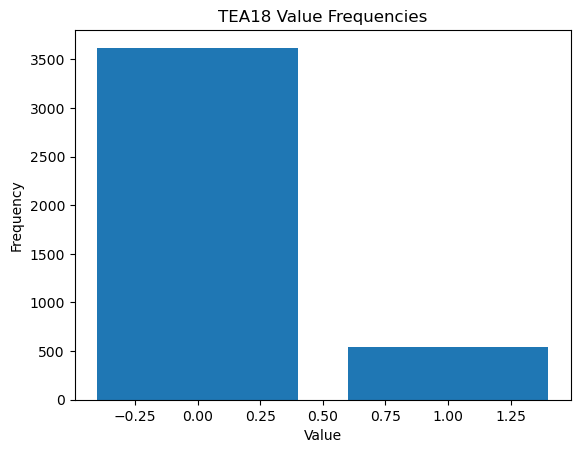

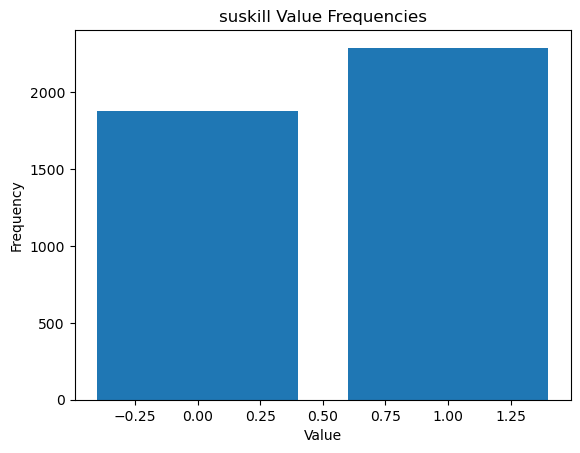

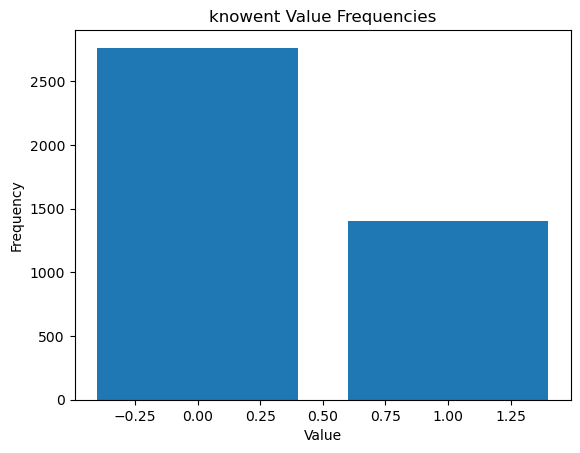

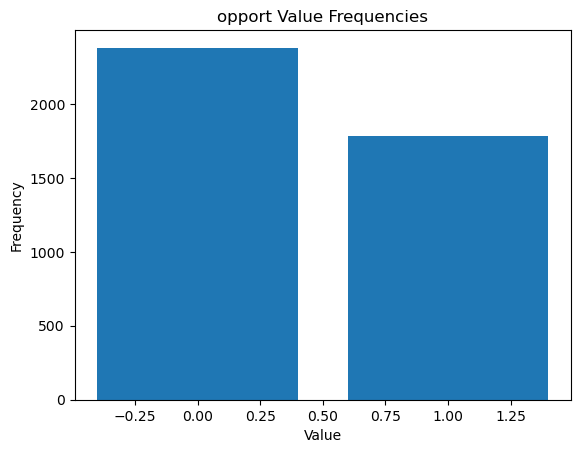

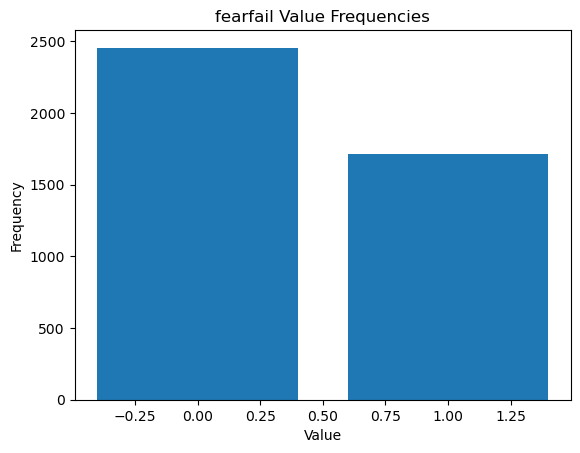

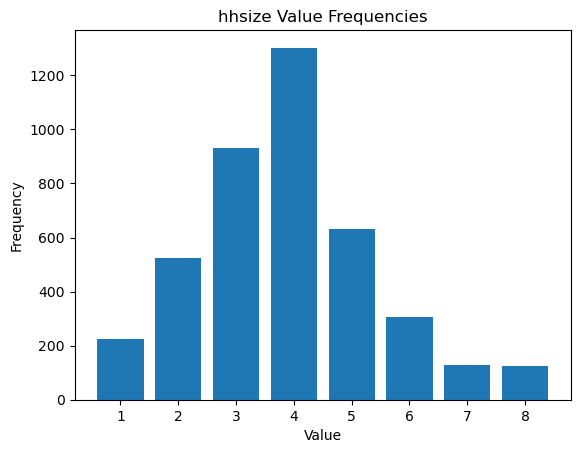

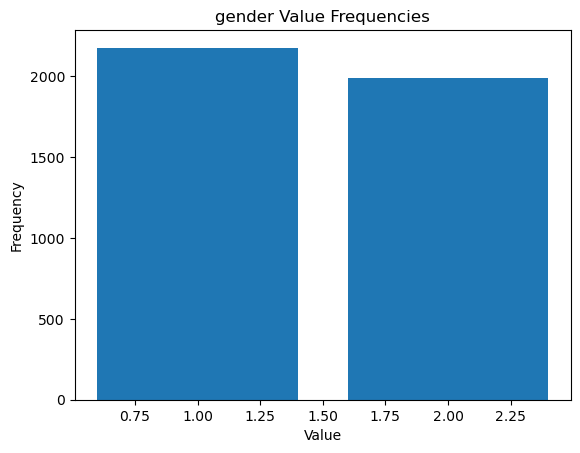

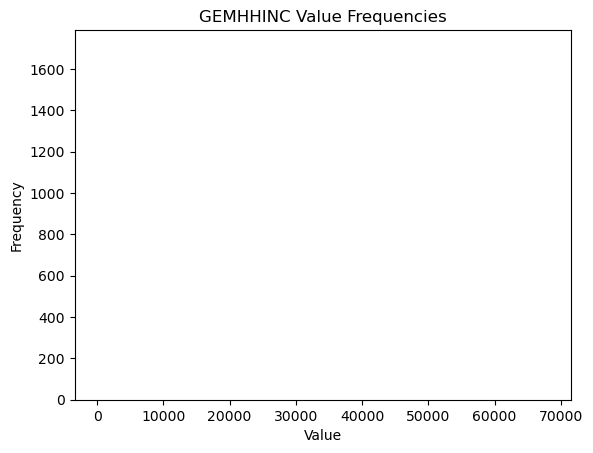

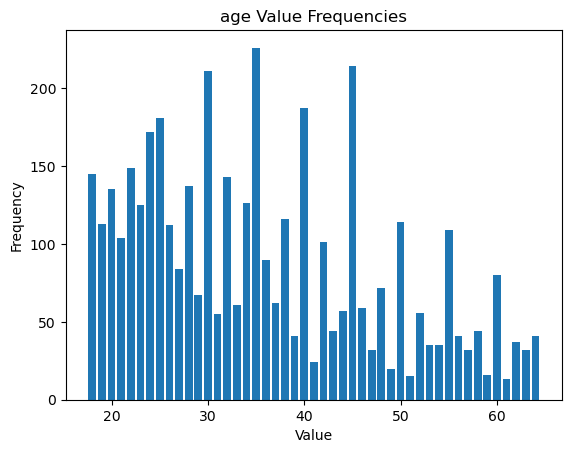

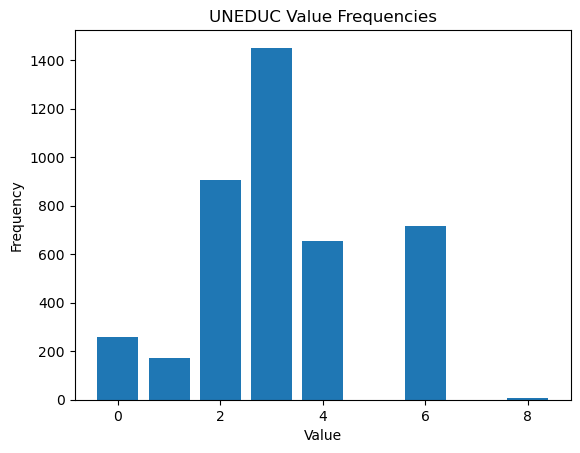

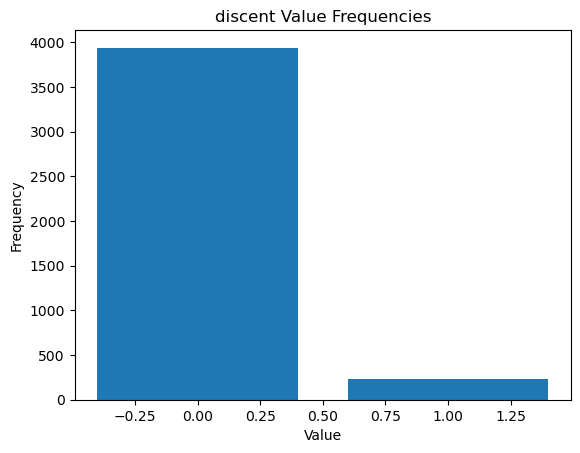

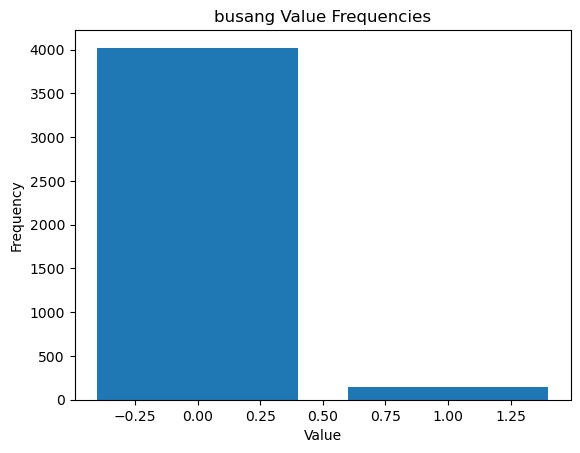

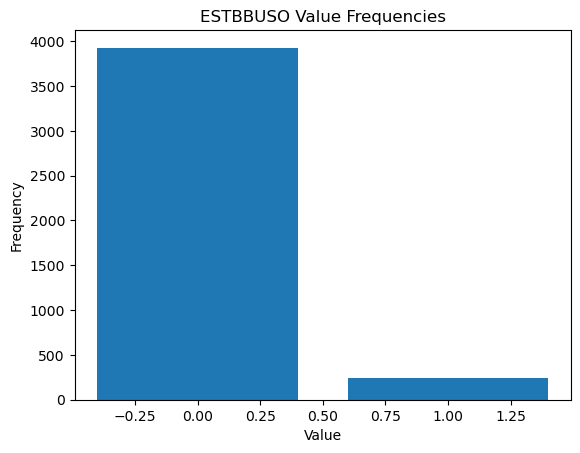

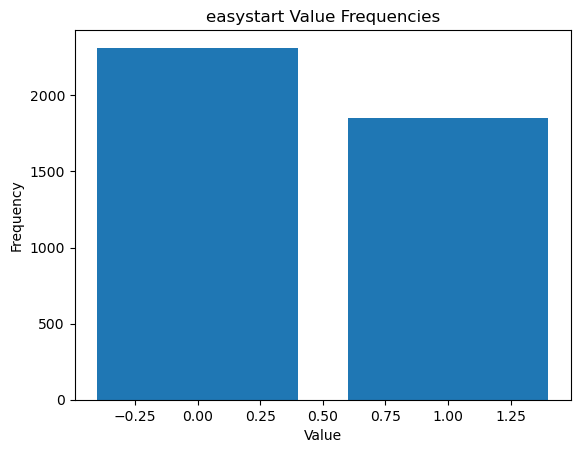

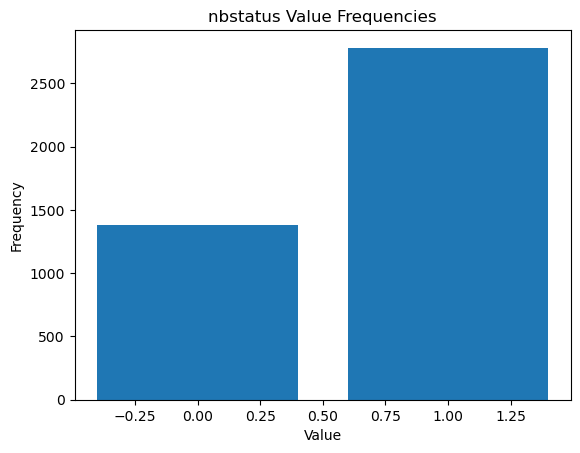

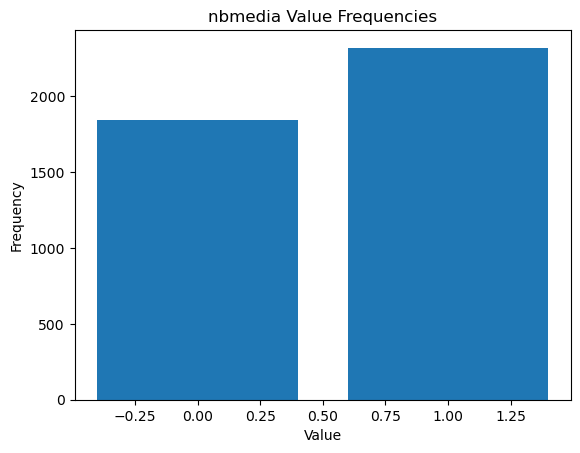

In [19]:
# Plot the frequency of each value

for col in keep_col:
    value_counts = dfus_new[col].value_counts()
    plt.figure()
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f"{col} Value Frequencies")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [20]:
unique_list=[]
for i in df_us['TEA18']:
    if i not in unique_list:
        unique_list.append(i)

print(unique_list)

[0.0, 1.0]


In [21]:
freq_dict={}
for val in unique_list:
    freq_dict[val]=len(df_us[df_us['TEA18']==val])

print(freq_dict)

{0.0: 3619, 1.0: 546}


#### % of entrepreneurs in US :

In [22]:
total_count = 0
for value in freq_dict.values():
    total_count += value
perc = freq_dict.get(1)/total_count
print(perc*100)

13.109243697478993


now to discretise hhsize, GEMHHINC,age, UNEDUC(not necessarily)

In [23]:
dfus_new['age'].min()

18.0

In [24]:
dfus_new['age'].max()

64.0

In [25]:
dfus_new['age'].mean()

35.63385354141656

In [26]:
thresholds = [35,60,101]
age_discrete=[]
for val in dfus_new['age']:
    if val< thresholds[0]:
        age_discrete.append(0)
    elif val < thresholds[1]:
        age_discrete.append(1)
    else :
        age_discrete.append(2)

dfus_new['age_discrete']= age_discrete


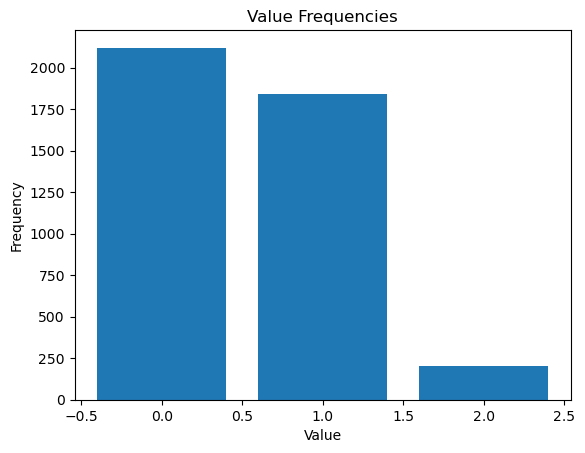

In [27]:
value_counts = dfus_new['age_discrete'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
plt.title('Value Frequencies')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()   

In [28]:
dfus_new=dfus_new.drop('age',axis=1)

need binary values only !

binary values for **gender**

In [29]:
dfus_new.loc[dfus_new['gender']==2,'gender']=0


females will be represented by 0

binary values for **age**

In [30]:
dummies_age = pd.get_dummies(dfus_new['age_discrete'],prefix='age')
print(dummies_age)

        age_0  age_1  age_2
104837   True  False  False
104838   True  False  False
104839  False   True  False
104840  False  False   True
104841   True  False  False
...       ...    ...    ...
108997   True  False  False
108998   True  False  False
108999  False   True  False
109000  False   True  False
109001  False   True  False

[4165 rows x 3 columns]


In [31]:
dfus_new=pd.concat([dfus_new,dummies_age],axis=1)

In [32]:
dfus_new = dfus_new.rename(columns={'age_0': 'young', 'age_1': 'adult', 'age_2': 'old'})

In [33]:
dfus_new=dfus_new.drop('age_discrete',axis=1)

binary values for **hhsize** (household size)

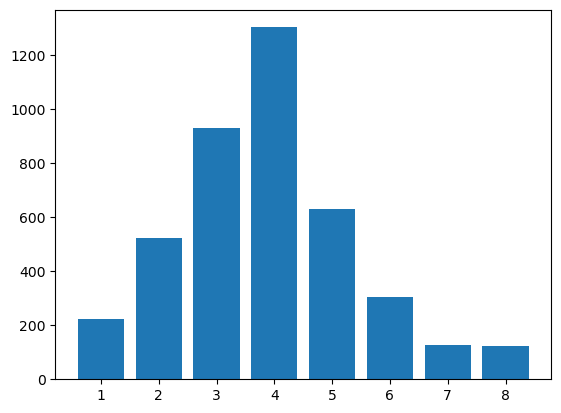

In [34]:
value_counts = dfus_new['hhsize'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
plt.show()

In [35]:
dfus_new['small_hhsize'] = dfus_new['hhsize'].apply(lambda x: 1 if x <= 2 else 0)
dfus_new['normal_hhsize'] = dfus_new['hhsize'].apply(lambda x: 1 if x > 2 and x < 5 else 0)
dfus_new['large_hhsize'] = dfus_new['hhsize'].apply(lambda x: 1 if x >= 5 else 0)

In [36]:
dfus_new=dfus_new.drop('hhsize',axis=1)

binary values for **UNEDUC** (educational attainment)

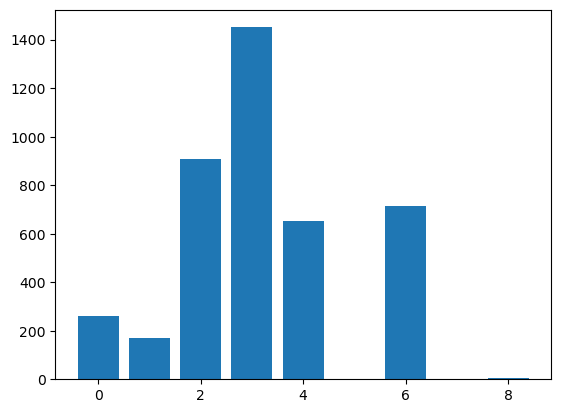

In [37]:
value_counts = dfus_new['UNEDUC'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
plt.show()

In [38]:
dfus_new['primary_educ'] = dfus_new['UNEDUC'].apply(lambda x: 1 if x <= 1 else 0)
dfus_new['secondary_educ'] = dfus_new['UNEDUC'].apply(lambda x: 1 if x > 1 and x <= 4 else 0)
dfus_new['tert_educ'] = dfus_new['UNEDUC'].apply(lambda x: 1 if x >= 5 else 0)

In [39]:
dfus_new=dfus_new.drop('UNEDUC',axis=1)

binary values for **GEMHHINC** (household income)

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

income_col= dfus_new['GEMHHINC'].values.reshape(-1,1)
income_discretized = discretizer.fit_transform(income_col)

dfus_new['lower_income'] = (income_discretized == 0).astype(int)
dfus_new['middle_income'] = (income_discretized == 1).astype(int)
dfus_new['upper_income'] = (income_discretized == 2).astype(int)




In [41]:
dfus_new=dfus_new.drop('GEMHHINC',axis=1)

In [42]:
dfus_new

,TEA18,suskill,knowent,opport,fearfail,gender,discent,busang,ESTBBUSO,easystart,...,old,small_hhsize,normal_hhsize,large_hhsize,primary_educ,secondary_educ,tert_educ,lower_income,middle_income,upper_income
104837,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0,0,1,1,0,0,1,0,0
104838,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0,1,0,0,0,1,0,1,0
104839,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,0,0,1,0,1,0,0,1,0
104840,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,1,0,0,0,1,0,0,1,0
104841,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,False,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108997,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,0,0,1,0,1,0,0,1,0
108998,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,0,0,1,0,1,0,0,1,0
108999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,False,0,0,1,0,0,1,0,1,0
109000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,1,0,0,0,1,0,1,0,0


<AxesSubplot:>

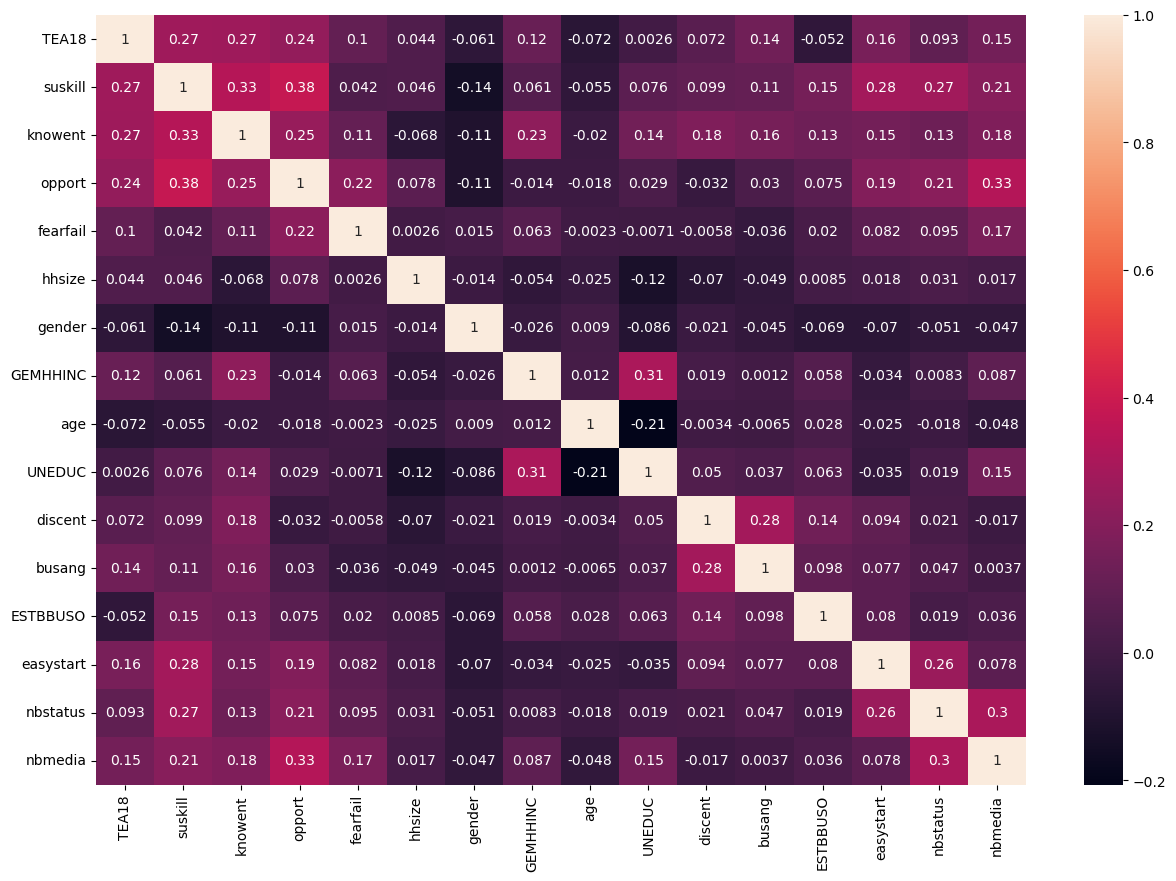

In [43]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(for_heatmap.corr(), annot = True)

In [44]:
final_cols=dfus_new.columns
print(final_cols)

Index(['TEA18', 'suskill', 'knowent', 'opport', 'fearfail', 'gender',
       'discent', 'busang', 'ESTBBUSO', 'easystart', 'nbstatus', 'nbmedia',
       'young', 'adult', 'old', 'small_hhsize', 'normal_hhsize',
       'large_hhsize', 'primary_educ', 'secondary_educ', 'tert_educ',
       'lower_income', 'middle_income', 'upper_income'],
      dtype='object')


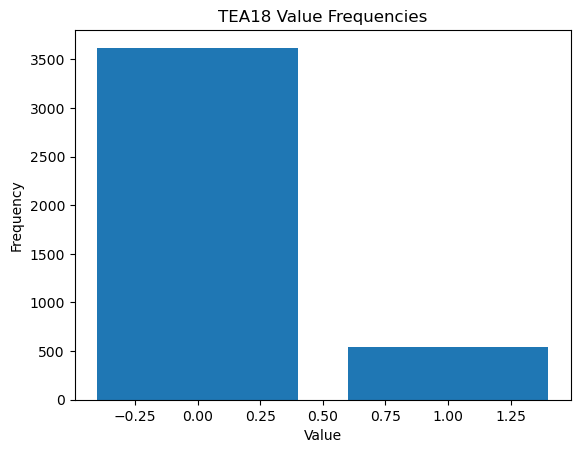

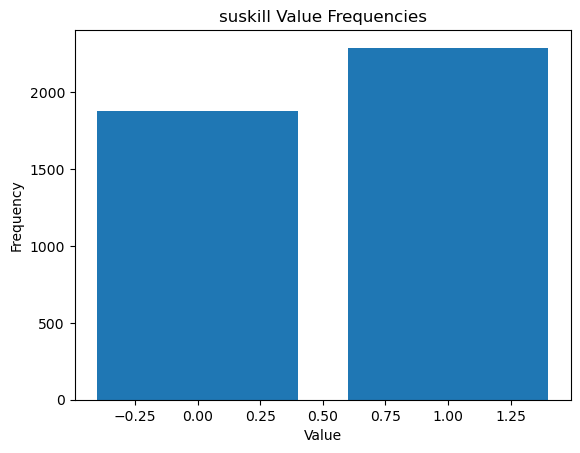

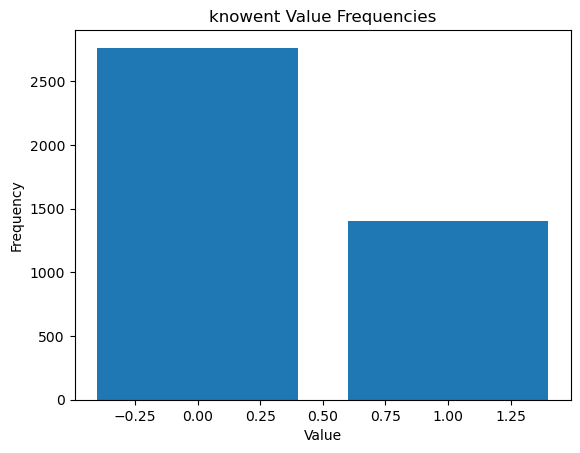

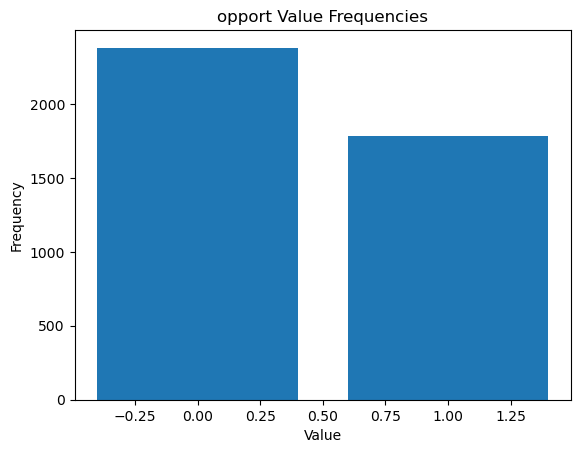

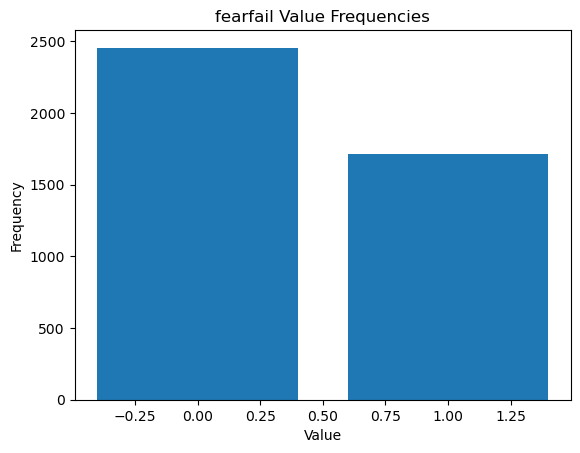

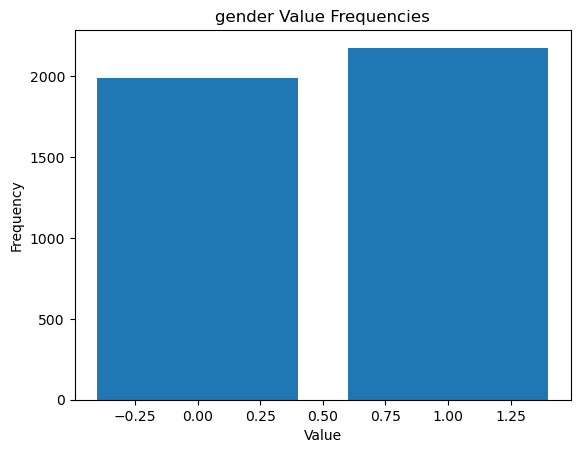

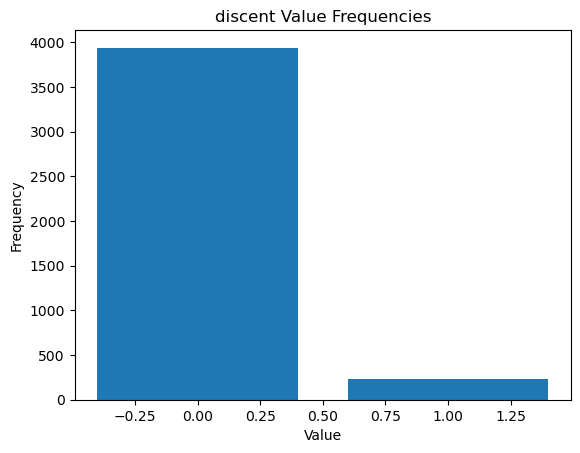

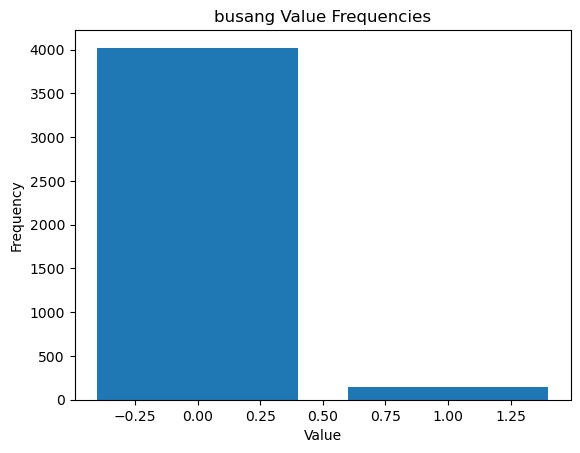

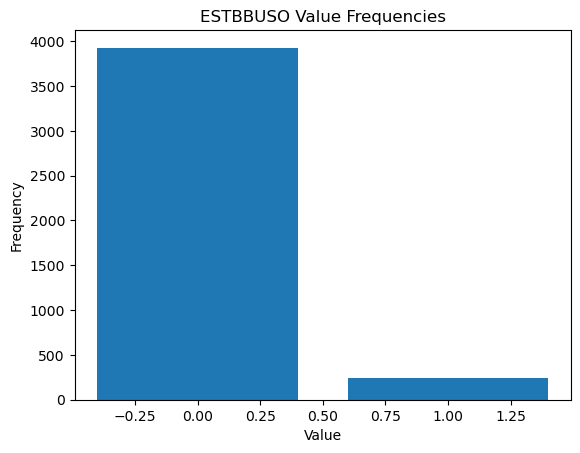

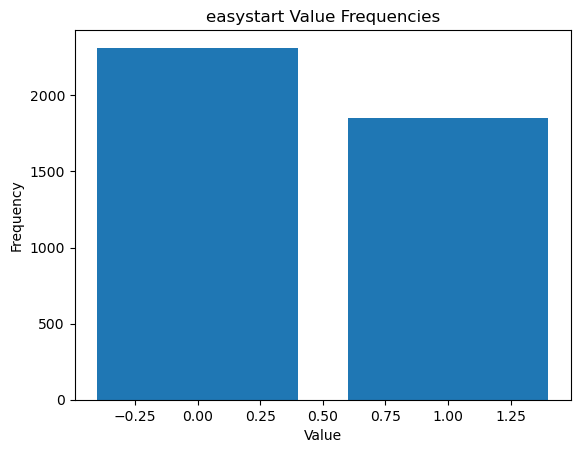

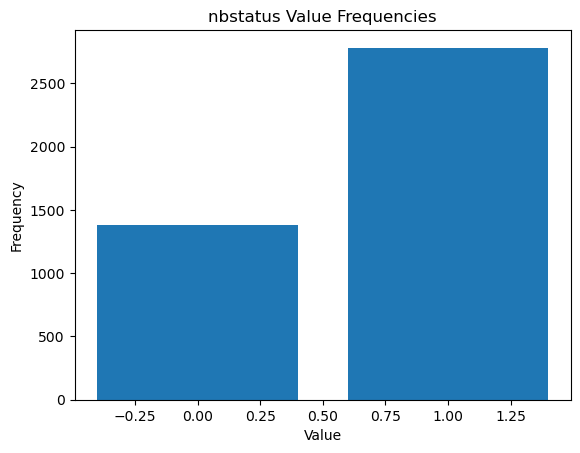

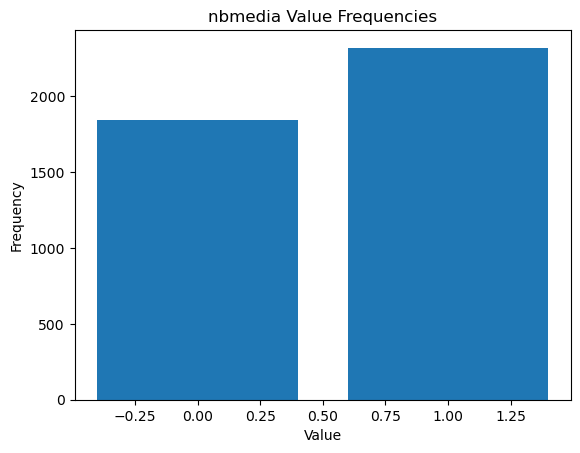

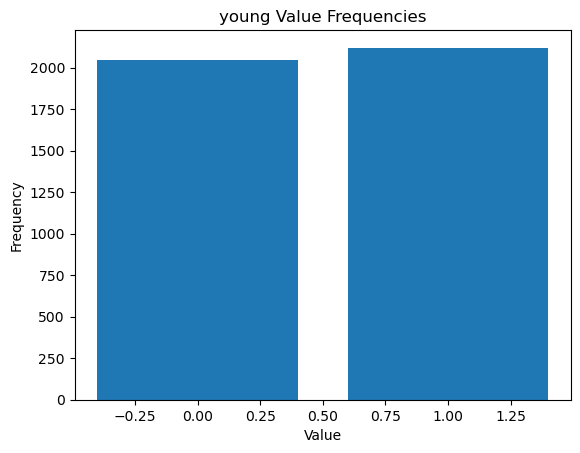

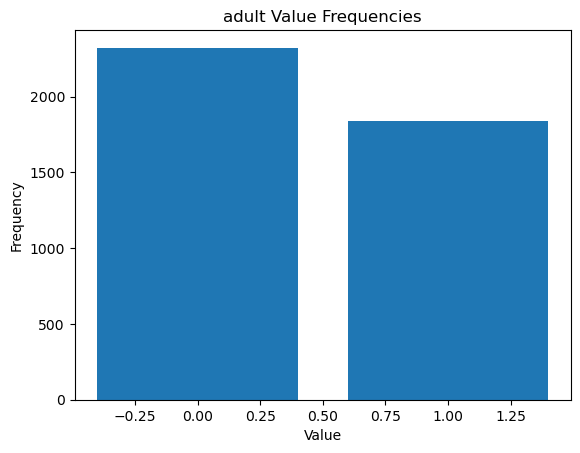

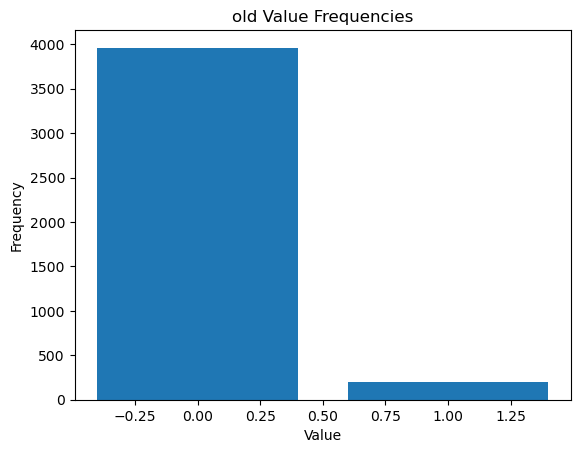

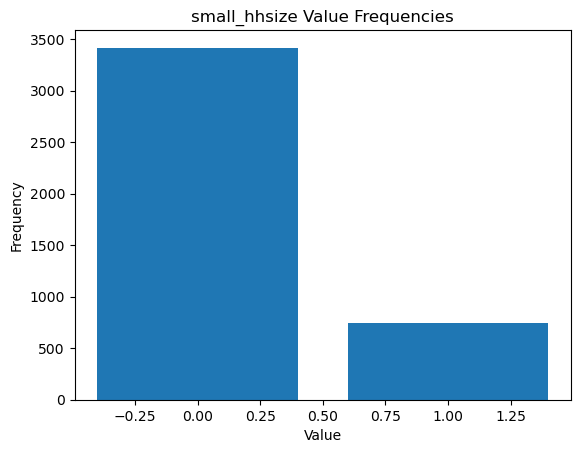

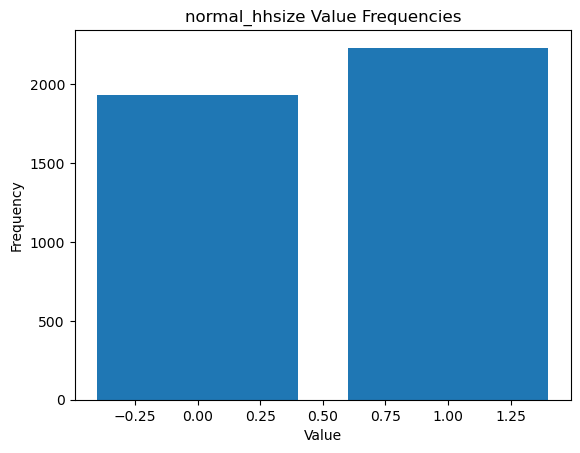

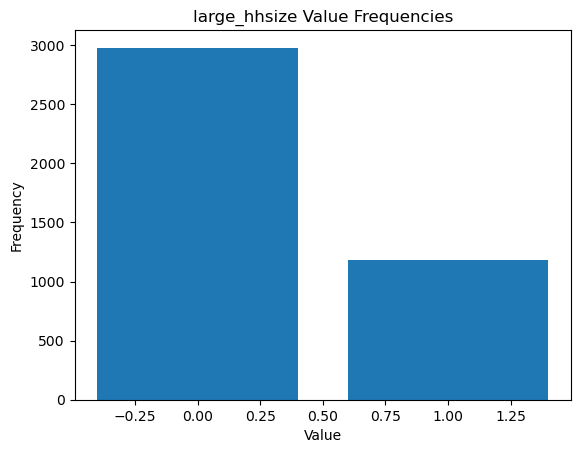

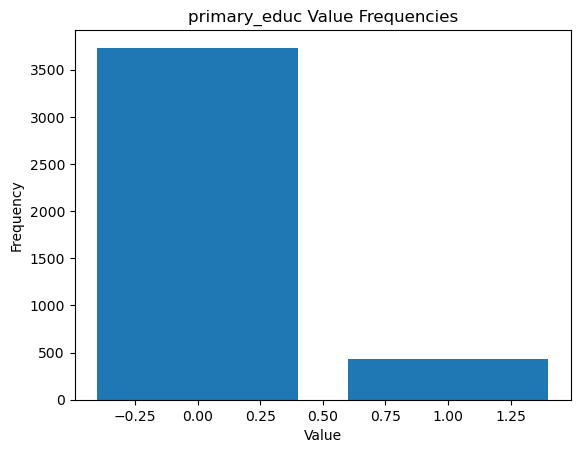

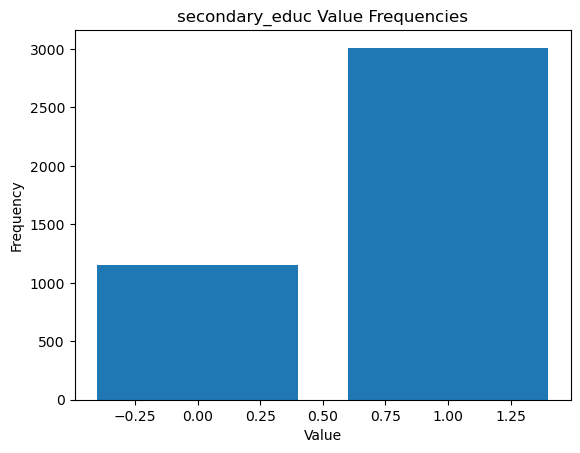

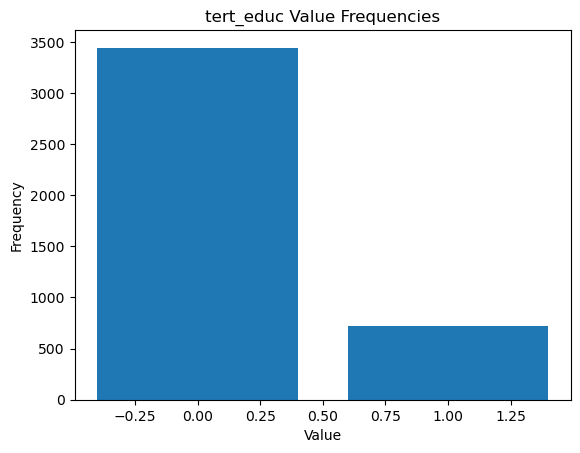

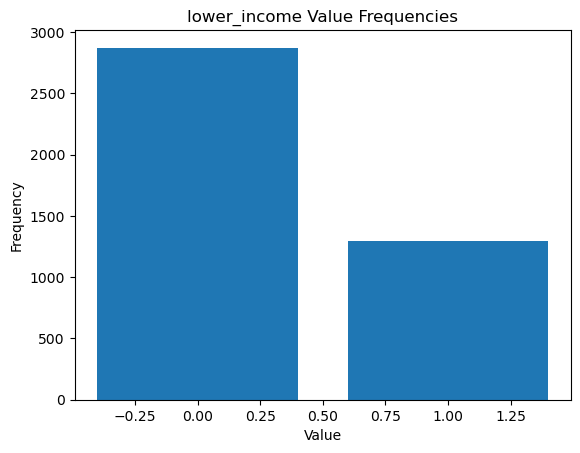

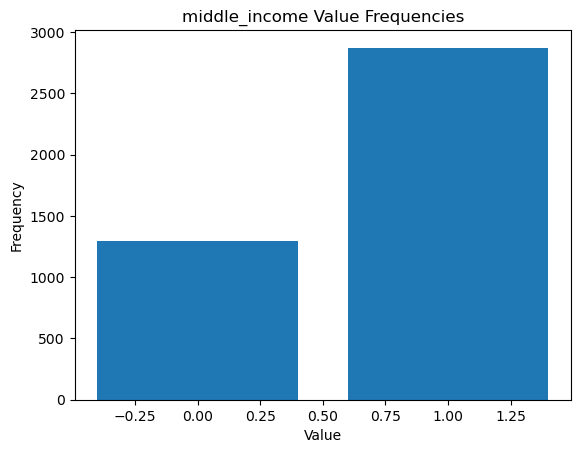

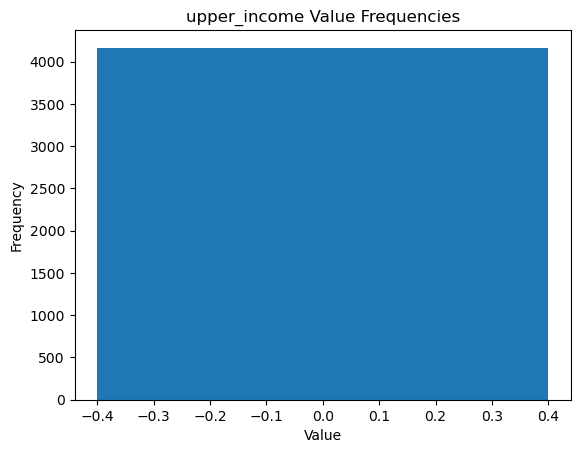

In [45]:
for col in final_cols:
    value_counts = dfus_new[col].value_counts()
    plt.figure()
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f"{col} Value Frequencies")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

upper %tile has 0 as the only value, see warning message 

In [46]:
dfus_new

,TEA18,suskill,knowent,opport,fearfail,gender,discent,busang,ESTBBUSO,easystart,...,old,small_hhsize,normal_hhsize,large_hhsize,primary_educ,secondary_educ,tert_educ,lower_income,middle_income,upper_income
104837,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0,0,1,1,0,0,1,0,0
104838,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0,1,0,0,0,1,0,1,0
104839,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,0,0,1,0,1,0,0,1,0
104840,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,1,0,0,0,1,0,0,1,0
104841,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,False,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108997,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,0,0,1,0,1,0,0,1,0
108998,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,0,0,1,0,1,0,0,1,0
108999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,False,0,0,1,0,0,1,0,1,0
109000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,1,0,0,0,1,0,1,0,0


## MODEL

In [47]:
data = pd.DataFrame(dfus_new)

In [48]:
def hot_encode1(P):  
    if(P<= 0):  
        return 0  
    if(P>= 1):  
        return 1  

In [49]:
data_encoded = data.applymap(hot_encode1)

In [50]:
temp_cols=data_encoded.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
data_encoded=data_encoded[new_cols]
print(data_encoded)

        suskill  knowent  opport  fearfail  gender  discent  busang  ESTBBUSO   
104837        1        0       0         0       0        0       0         0  \
104838        1        1       0         0       0        0       0         0   
104839        0        0       1         1       0        0       0         0   
104840        1        1       0         0       1        0       0         0   
104841        1        1       1         1       0        0       0         0   
...         ...      ...     ...       ...     ...      ...     ...       ...   
108997        0        1       1         0       1        0       0         0   
108998        1        0       0         1       1        0       0         0   
108999        0        0       0         1       0        0       0         0   
109000        1        1       0         0       0        0       0         0   
109001        1        1       0         0       0        0       0         0   

        easystart  nbstatus

In [51]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4165 entries, 104837 to 109001
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   suskill         4165 non-null   int64
 1   knowent         4165 non-null   int64
 2   opport          4165 non-null   int64
 3   fearfail        4165 non-null   int64
 4   gender          4165 non-null   int64
 5   discent         4165 non-null   int64
 6   busang          4165 non-null   int64
 7   ESTBBUSO        4165 non-null   int64
 8   easystart       4165 non-null   int64
 9   nbstatus        4165 non-null   int64
 10  nbmedia         4165 non-null   int64
 11  young           4165 non-null   int64
 12  adult           4165 non-null   int64
 13  old             4165 non-null   int64
 14  small_hhsize    4165 non-null   int64
 15  normal_hhsize   4165 non-null   int64
 16  large_hhsize    4165 non-null   int64
 17  primary_educ    4165 non-null   int64
 18  secondary_educ  4165 non-n

In [89]:
train_size = int(data_encoded.shape[0]*0.8)

In [90]:
x_train = data_encoded[:train_size]

In [92]:
x_test = data_encoded[train_size:]

In [93]:
y_test = x_test['TEA18']

In [94]:
y_test = np.array(y_test)

In [95]:
x_test.drop(['TEA18'], axis=1)

,suskill,knowent,opport,fearfail,gender,discent,busang,ESTBBUSO,easystart,nbstatus,...,old,small_hhsize,normal_hhsize,large_hhsize,primary_educ,secondary_educ,tert_educ,lower_income,middle_income,upper_income
108169,1,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
108170,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
108171,1,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
108172,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
108173,0,1,1,1,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108997,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
108998,1,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
108999,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
109000,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [96]:
Test = np.array(x_test)

In [97]:

X_test = [[col for col, val in zip(x_test.columns, row) if val == 1] for row in Test]

In [98]:
print(len(X_test), len(y_test))

833 833


In [99]:
frq_items = apriori(x_train, min_support = 0.05, use_colnames = True)  
rules = association_rules(frq_items, metric = "lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

C:\Users\rishi\AppData\Roaming\Python\Python38\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [100]:
frq_items = frq_items.sort_values(['support'] , ascending=False)

In [101]:
frq_items[0:20]

,support,itemsets
16,0.727791,(secondary_educ)
19,0.684874,(middle_income)
8,0.661164,(nbstatus)
9,0.556122,(nbmedia)
0,0.549520,(suskill)
13,0.536615,(normal_hhsize)
4,0.519508,(gender)
160,0.516507,"(middle_income, secondary_educ)"
10,0.511405,(young)
115,0.481092,"(nbstatus, secondary_educ)"


In [102]:

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43597,"(knowent, opport, nbstatus, TEA18, secondary_e...",(suskill),0.053721,0.549520,0.052521,0.977654,1.779105,0.023000,20.158989
47625,"(knowent, nbstatus, nbmedia, TEA18, secondary_...",(suskill),0.053721,0.549520,0.052521,0.977654,1.779105,0.023000,20.158989
52729,"(easystart, opport, nbstatus, TEA18, secondary...",(suskill),0.053121,0.549520,0.051621,0.971751,1.768365,0.022429,15.946999
79868,"(fearfail, suskill, easystart, knowent, opport...",(nbstatus),0.051621,0.661164,0.050120,0.970930,1.468515,0.015990,11.655942
17794,"(TEA18, knowent, nbstatus, secondary_educ)",(suskill),0.059124,0.549520,0.057323,0.969543,1.764346,0.024833,14.790766
...,...,...,...,...,...,...,...,...,...
79739,(secondary_educ),"(easystart, opport, nbstatus, gender, nbmedia,...",0.727791,0.063625,0.050120,0.068866,1.082365,0.003814,1.005628
26385,(secondary_educ),"(suskill, nbstatus, large_hhsize, young)",0.727791,0.064226,0.050120,0.068866,1.072250,0.003377,1.004983
62897,(secondary_educ),"(normal_hhsize, knowent, nbstatus, gender, mid...",0.727791,0.064226,0.050120,0.068866,1.072250,0.003377,1.004983
36869,(secondary_educ),"(normal_hhsize, fearfail, easystart, gender)",0.727791,0.066627,0.050120,0.068866,1.033610,0.001630,1.002405


In [103]:
rules.reset_index(drop=True, inplace=True)

In [104]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(knowent, opport, nbstatus, TEA18, secondary_e...",(suskill),0.053721,0.549520,0.052521,0.977654,1.779105,0.023000,20.158989
1,"(knowent, nbstatus, nbmedia, TEA18, secondary_...",(suskill),0.053721,0.549520,0.052521,0.977654,1.779105,0.023000,20.158989
2,"(easystart, opport, nbstatus, TEA18, secondary...",(suskill),0.053121,0.549520,0.051621,0.971751,1.768365,0.022429,15.946999
3,"(fearfail, suskill, easystart, knowent, opport...",(nbstatus),0.051621,0.661164,0.050120,0.970930,1.468515,0.015990,11.655942
4,"(TEA18, knowent, nbstatus, secondary_educ)",(suskill),0.059124,0.549520,0.057323,0.969543,1.764346,0.024833,14.790766
...,...,...,...,...,...,...,...,...,...
81131,(secondary_educ),"(easystart, opport, nbstatus, gender, nbmedia,...",0.727791,0.063625,0.050120,0.068866,1.082365,0.003814,1.005628
81132,(secondary_educ),"(suskill, nbstatus, large_hhsize, young)",0.727791,0.064226,0.050120,0.068866,1.072250,0.003377,1.004983
81133,(secondary_educ),"(normal_hhsize, knowent, nbstatus, gender, mid...",0.727791,0.064226,0.050120,0.068866,1.072250,0.003377,1.004983
81134,(secondary_educ),"(normal_hhsize, fearfail, easystart, gender)",0.727791,0.066627,0.050120,0.068866,1.033610,0.001630,1.002405


In [105]:
rules[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(knowent, opport, nbstatus, TEA18, secondary_e...",(suskill),0.053721,0.549520,0.052521,0.977654,1.779105,0.023000,20.158989
1,"(knowent, nbstatus, nbmedia, TEA18, secondary_...",(suskill),0.053721,0.549520,0.052521,0.977654,1.779105,0.023000,20.158989
2,"(easystart, opport, nbstatus, TEA18, secondary...",(suskill),0.053121,0.549520,0.051621,0.971751,1.768365,0.022429,15.946999
3,"(fearfail, suskill, easystart, knowent, opport...",(nbstatus),0.051621,0.661164,0.050120,0.970930,1.468515,0.015990,11.655942
4,"(TEA18, knowent, nbstatus, secondary_educ)",(suskill),0.059124,0.549520,0.057323,0.969543,1.764346,0.024833,14.790766
5,"(TEA18, nbstatus, knowent, easystart)",(suskill),0.054922,0.549520,0.053121,0.967213,1.760106,0.022941,13.739646
6,"(TEA18, nbstatus, easystart, opport)",(suskill),0.063025,0.549520,0.060924,0.966667,1.759112,0.026291,13.514406
7,"(easystart, opport, nbstatus, nbmedia, TEA18)",(suskill),0.053721,0.549520,0.051921,0.966480,1.758773,0.022400,13.439326
8,"(fearfail, suskill, easystart, knowent, opport...",(nbstatus),0.052221,0.661164,0.050420,0.965517,1.460328,0.015894,9.826230
9,"(knowent, nbstatus, TEA18, middle_income, seco...",(suskill),0.051921,0.549520,0.050120,0.965318,1.756657,0.021589,12.988846


In [106]:
rules['antecedents'][8]

frozenset({'easystart',
           'fearfail',
           'knowent',
           'middle_income',
           'nbmedia',
           'opport',
           'suskill'})

In [107]:
rules1 = rules[rules['consequents'] == frozenset({'TEA18'})]
rules1.reset_index(drop=True, inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(suskill, knowent, opport, nbstatus, nbmedia, ...",(TEA18),0.105042,0.135354,0.051020,0.485714,3.588470,0.036803,1.681256
1,"(suskill, knowent, opport, middle_income, seco...",(TEA18),0.107443,0.135354,0.051020,0.474860,3.508281,0.036478,1.646506
2,"(suskill, knowent, opport, nbmedia, secondary_...",(TEA18),0.109544,0.135354,0.051921,0.473973,3.501722,0.037094,1.643728
3,"(suskill, knowent, opport, nbstatus, secondary...",(TEA18),0.112245,0.135354,0.052521,0.467914,3.456964,0.037328,1.625013
4,"(nbstatus, knowent, easystart, opport)",(TEA18),0.107443,0.135354,0.050120,0.466480,3.446370,0.035577,1.620645
...,...,...,...,...,...,...,...,...,...
235,"(normal_hhsize, nbstatus)",(TEA18),0.354742,0.135354,0.054622,0.153976,1.137581,0.006606,1.022011
236,(middle_income),(TEA18),0.684874,0.135354,0.104142,0.152060,1.123420,0.011441,1.019701
237,(secondary_educ),(TEA18),0.727791,0.135354,0.109844,0.150928,1.115059,0.011334,1.018342
238,"(normal_hhsize, secondary_educ)",(TEA18),0.395858,0.135354,0.057923,0.146323,1.081038,0.004342,1.012849


In [108]:
final_rules = pd.DataFrame(columns=['antecedents','consequents','antecedent support','consequent support','support','confidence','lift','leverage','conviction'])

In [109]:
for i in range(0,len(rules1)):
    final_rules.loc[len(final_rules.index)] = [ list(rules1['antecedents'][i]) , list(rules1['consequents'][i]), rules1['antecedent support'][i], rules1['consequent support'][i],rules1['support'][i],rules1['confidence'][i],rules1['lift'][i],rules1['leverage'][i],rules1['conviction'][i]]

In [110]:
final_rules.reset_index(drop=True, inplace=True)
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"[suskill, knowent, opport, nbstatus, nbmedia, ...",[TEA18],0.105042,0.135354,0.051020,0.485714,3.588470,0.036803,1.681256
1,"[suskill, knowent, opport, middle_income, seco...",[TEA18],0.107443,0.135354,0.051020,0.474860,3.508281,0.036478,1.646506
2,"[suskill, knowent, opport, nbmedia, secondary_...",[TEA18],0.109544,0.135354,0.051921,0.473973,3.501722,0.037094,1.643728
3,"[suskill, knowent, opport, nbstatus, secondary...",[TEA18],0.112245,0.135354,0.052521,0.467914,3.456964,0.037328,1.625013
4,"[nbstatus, knowent, easystart, opport]",[TEA18],0.107443,0.135354,0.050120,0.466480,3.446370,0.035577,1.620645
...,...,...,...,...,...,...,...,...,...
235,"[normal_hhsize, nbstatus]",[TEA18],0.354742,0.135354,0.054622,0.153976,1.137581,0.006606,1.022011
236,[middle_income],[TEA18],0.684874,0.135354,0.104142,0.152060,1.123420,0.011441,1.019701
237,[secondary_educ],[TEA18],0.727791,0.135354,0.109844,0.150928,1.115059,0.011334,1.018342
238,"[normal_hhsize, secondary_educ]",[TEA18],0.395858,0.135354,0.057923,0.146323,1.081038,0.004342,1.012849


In [111]:
final_rules[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"[suskill, knowent, opport, nbstatus, nbmedia, ...",[TEA18],0.105042,0.135354,0.051020,0.485714,3.588470,0.036803,1.681256
1,"[suskill, knowent, opport, middle_income, seco...",[TEA18],0.107443,0.135354,0.051020,0.474860,3.508281,0.036478,1.646506
2,"[suskill, knowent, opport, nbmedia, secondary_...",[TEA18],0.109544,0.135354,0.051921,0.473973,3.501722,0.037094,1.643728
3,"[suskill, knowent, opport, nbstatus, secondary...",[TEA18],0.112245,0.135354,0.052521,0.467914,3.456964,0.037328,1.625013
4,"[nbstatus, knowent, easystart, opport]",[TEA18],0.107443,0.135354,0.050120,0.466480,3.446370,0.035577,1.620645
5,"[suskill, easystart, knowent, opport]",[TEA18],0.116447,0.135354,0.053721,0.461340,3.408394,0.037960,1.605180
6,"[suskill, knowent, nbstatus, nbmedia, secondar...",[TEA18],0.114046,0.135354,0.052521,0.460526,3.402381,0.037084,1.602758
7,"[suskill, knowent, opport, nbstatus, middle_in...",[TEA18],0.117947,0.135354,0.054022,0.458015,3.383829,0.038057,1.595332
8,"[suskill, knowent, opport, nbmedia, middle_inc...",[TEA18],0.117347,0.135354,0.053721,0.457801,3.382242,0.037838,1.594701
9,"[suskill, knowent, nbmedia, middle_income, sec...",[TEA18],0.109844,0.135354,0.050120,0.456284,3.371039,0.035252,1.590253


In [161]:
model = list((final_rules['antecedents'][:10]))

In [162]:
model

[['suskill', 'knowent', 'opport', 'nbstatus', 'nbmedia', 'middle_income'],
 ['suskill', 'knowent', 'opport', 'middle_income', 'secondary_educ'],
 ['suskill', 'knowent', 'opport', 'nbmedia', 'secondary_educ'],
 ['suskill', 'knowent', 'opport', 'nbstatus', 'secondary_educ'],
 ['nbstatus', 'knowent', 'easystart', 'opport'],
 ['suskill', 'easystart', 'knowent', 'opport'],
 ['suskill', 'knowent', 'nbstatus', 'nbmedia', 'secondary_educ'],
 ['suskill', 'knowent', 'opport', 'nbstatus', 'middle_income'],
 ['suskill', 'knowent', 'opport', 'nbmedia', 'middle_income'],
 ['suskill', 'knowent', 'nbmedia', 'middle_income', 'secondary_educ']]

In [163]:
len(X_test)

833

In [164]:
n = len(X_test)
y_pred = [0] * n
i = -1
for list1 in X_test:
    i = i+1
    list1 = set(list1)
    for list2 in model:
        list2 = set(list2)
        if list2.issubset(list1):
            y_pred[i] = 1
            break

In [165]:
y_pred = np.array(y_pred)

In [166]:
accuracy = np.mean(y_pred == y_test)
print(accuracy)

0.8175270108043218


In [171]:
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0
for i in range(len(y_test)):
    if(y_pred[i] == 0):
        if(y_test[i] == 0):
            true_neg = true_neg+1
        elif(y_test[i] == 1):
            false_neg = false_neg+1
    if(y_pred[i] == 1):
        if(y_test[i] == 0):
            false_pos = false_pos+1
        elif(y_test[i] == 1):
            true_pos = true_pos+1

In [172]:
precision = true_pos/(true_pos+false_pos)
recall = true_pos/(true_pos+false_neg)
F1_score = (2*(precision*recall))/(precision+recall)

In [173]:
print('precision: ', precision)
print('Recall', recall)
print('F1 Score', F1_score)

precision:  0.3184713375796178
Recall 0.5263157894736842
F1 Score 0.39682539682539675
